## 4.9 Intro to Data Visualization with Python Part 2

### Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Setting Path

In [2]:
path = r'\Users\edwin\Instacart Basket Analysis'
path

'\\Users\\edwin\\Instacart Basket Analysis'

#### Importing the Data

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merge_2
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [5]:
ords_prods_all.shape

(32404859, 36)

### Task 2 Create a bar chart, histogram, scatterplot; Plus line chart with sample subset

### Bar Chart

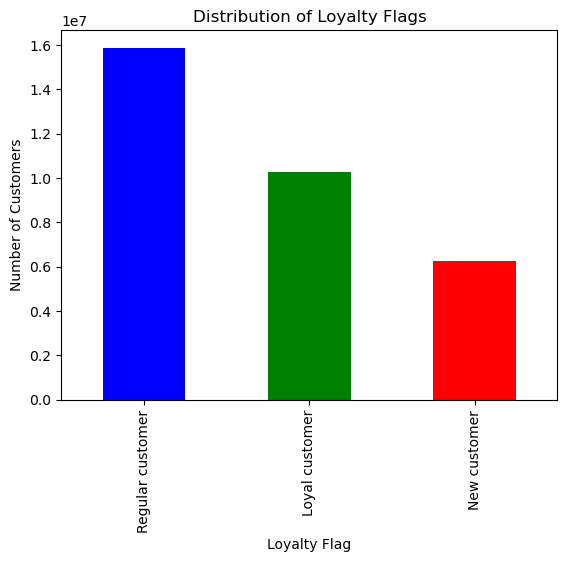

In [6]:
# Create a bar chart for the loyalty_flag column
loyalty_flag_counts = ords_prods_all['loyalty_flag'].value_counts()
loyalty_flag_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Loyalty Flags')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Customers')
plt.show()

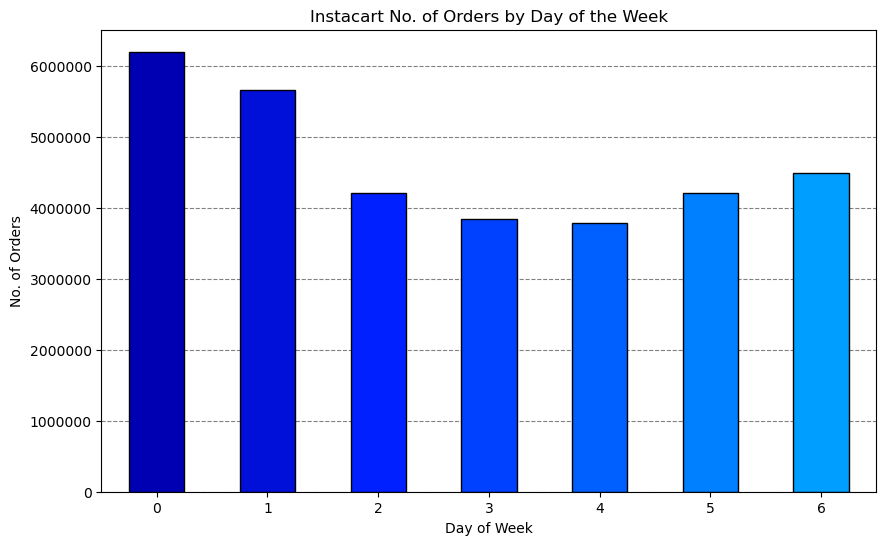

In [8]:
# Ordering columns based on index (chronological order)
plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['#0000b3', '#0010d9', '#0020ff', '#0040ff', '#0060ff', '#0080ff', '#009fff'],
                                                                          zorder = 2, 
                                                                          edgecolor = 'black')
                                                                         
plt.title('Instacart No. of Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('No. of Orders')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_orders_by_day.png'), bbox_inches = 'tight')

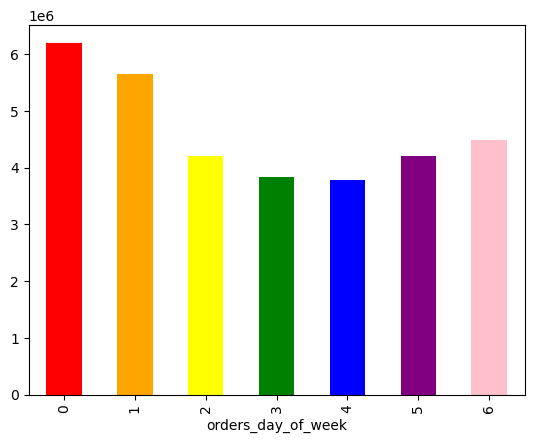

In [9]:
# Colouring columns, sorting by index, and saving as an object
bar = ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])

### Histogram

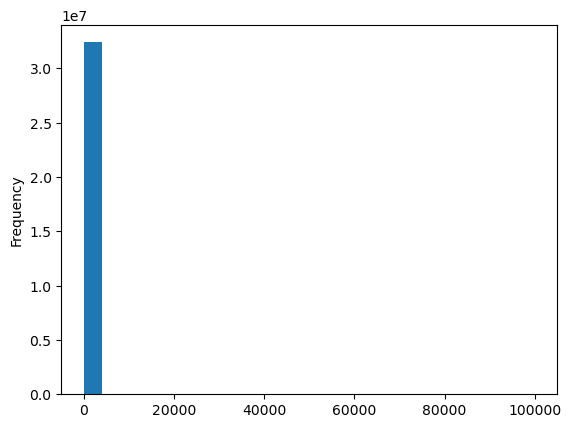

In [12]:
# Create and save histogram as an object
hist = ords_prods_all['prices'].plot.hist(bins = 25)

### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

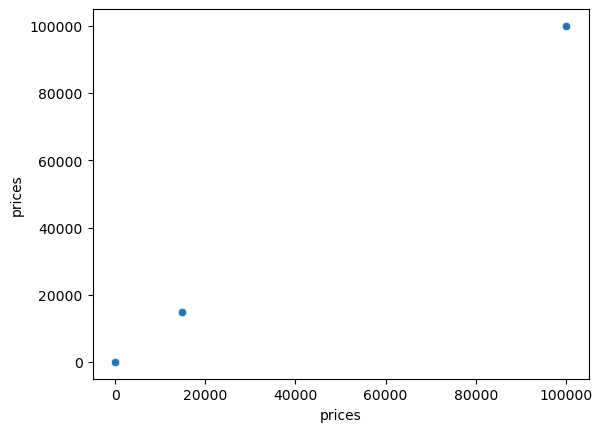

In [13]:
# Use scatterplot to check for outlier values in the prices column
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_all)

### Line Chart

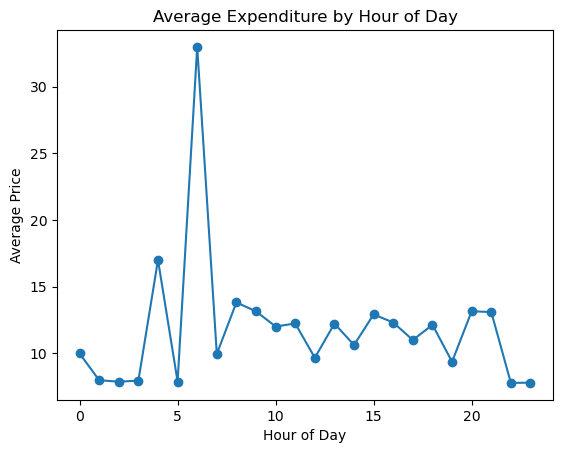

In [15]:
# Create a line chart to check expenditure depending on the hour of the day
sample = ords_prods_all.sample(n=1000000, random_state=1)  # Use a sample for efficiency
line_chart_data = sample.groupby('order_time_of_day')['prices'].mean()
line_chart_data.plot(kind='line', marker='o')
plt.title('Average Expenditure by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.show()


### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

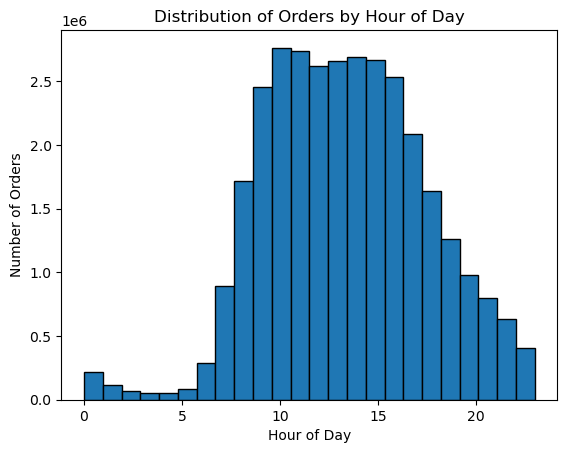

In [16]:
# Create a histogram of the order_hour_of_day column
ords_prods_all['order_time_of_day'].plot(kind='hist', bins=24, edgecolor='black')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()


The histogram shows the distribution of orders throughout the day. It indicates the hours during which most orders are placed, revealing peak shopping times. The x-axis represents the hours of the day (0-23), and the y-axis represents the number of orders. From the histogram, we can see that most orders are placed during the late morning and early afternoon hours.


### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

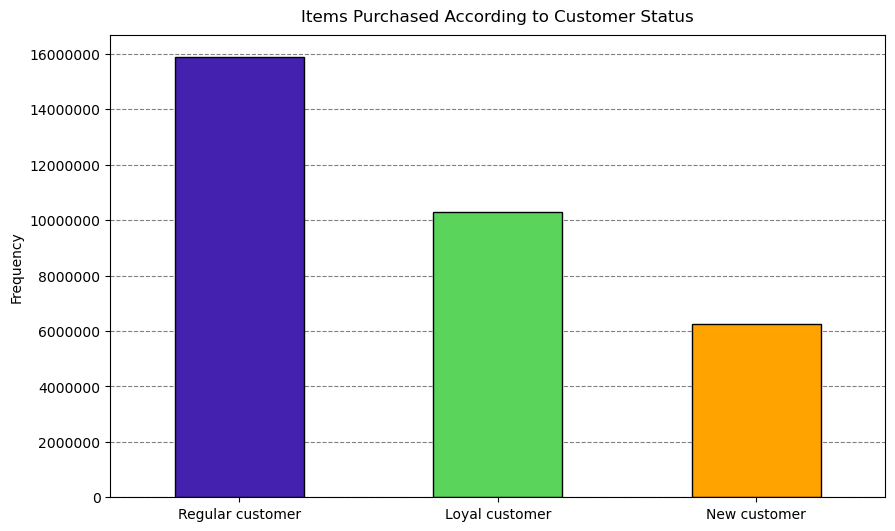

In [17]:
bar_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['#4421af', '#5ad45a', '#ffa300'],
                                                       zorder = 2, 
                                                       edgecolor = 'black')
plt.title('Items Purchased According to Customer Status', pad=10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_loyalty_vs_total_item2.png'), bbox_inches = 'tight')

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [25]:
# Create a sample of the data for efficiency
sample = ords_prods_all.sample(n=1000000, random_state=1)


In [26]:
# Group the data by order hour of the day and calculate the mean prices
hourly_expenditure = sample.groupby('order_time_of_day')['prices'].mean()


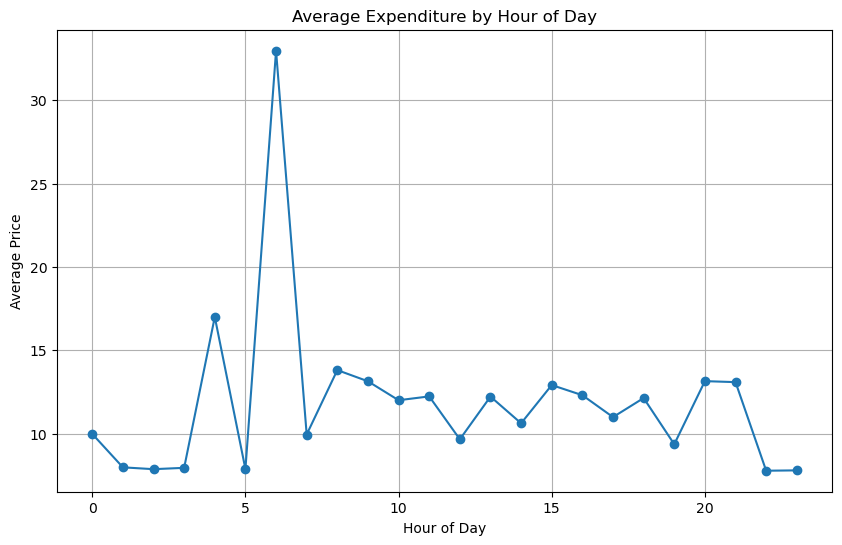

In [27]:
# Plot the line chart
plt.figure(figsize=(10,6))
hourly_expenditure.plot(kind='line', marker='o')
plt.title('Average Expenditure by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


### Average Expenditure by Hour of Day

The line chart above shows the average expenditure (prices) for each hour of the day. From the chart, we can observe how spending changes throughout the day. This information can help identify peak hours when customers tend to spend more.


### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

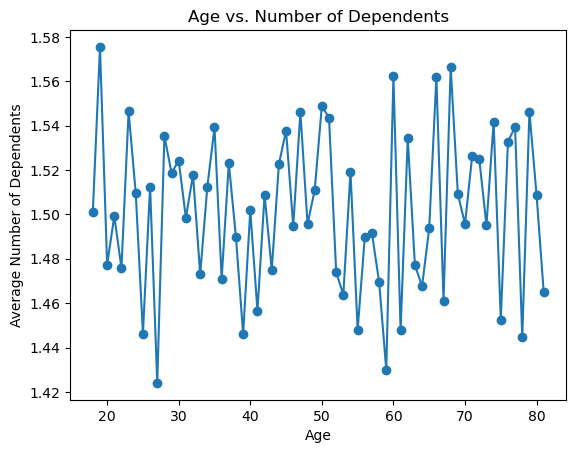

In [30]:
# Create a line chart exploring the connection between age and number of dependents
line_chart_data = sample.groupby('Age')['n_dependants'].mean()
line_chart_data.plot(kind='line', marker='o')
plt.title('Age vs. Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.show()


The line chart illustrates the relationship between the age of customers and their average number of dependents. The x-axis represents the age of customers, and the y-axis represents the average number of dependents. The chart shows that as age increases, the number of dependents generally follows a specific trend, which may help in understanding family dynamics across different age groups.


### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

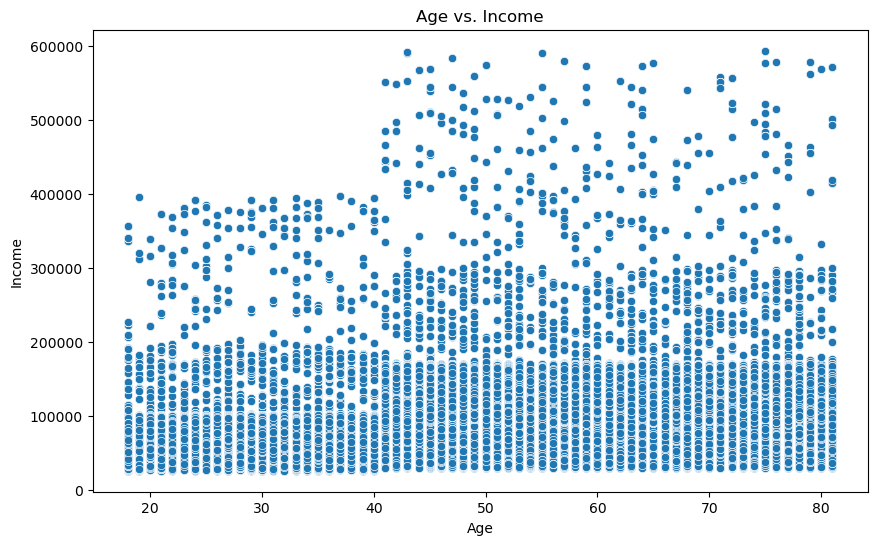

In [33]:
# Create a scatterplot to explore the relationship between age and spending power (income)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='income', data=sample)
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


The scatterplot visualizes the relationship between age and income. Each point represents a customer, with the x-axis showing the customer's age and the y-axis showing their income. The scatterplot helps in identifying patterns and correlations between age and spending power, which can be useful for targeted marketing strategies.


### Export visualizations as .png

In [35]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_distribution.png'))

<Figure size 640x480 with 0 Axes>

In [36]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_orders_by_day.png'), bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [37]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))


<Figure size 640x480 with 0 Axes>

In [38]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_scatterplot.png'))


<Figure size 640x480 with 0 Axes>

In [39]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_of_day_histogram.png'))


<Figure size 640x480 with 0 Axes>

In [40]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_loyalty_vs_total_item2.png'), bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [41]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'average_expenditure_by_hour.png'))


<Figure size 640x480 with 0 Axes>

In [42]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_dependents.png'))


<Figure size 640x480 with 0 Axes>

In [46]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_income.png'))
plt.show()



<Figure size 640x480 with 0 Axes>